# Wetterstation Kloten

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import datetime
from scipy.interpolate import interp1d
from scipy import integrate
from scipy import optimize

## 1. Import der Daten
   - Beschreibt die Datenstruktur.
   - Zeigt auf, wie viele Messungen es sind.

### Datenimport und Datenvorbereitung
1. Die Wetterdaten aus der CSV-Datei "`Daten/Zürich21-22.csv`" importieren. Diese enthält die Informationen für verschiedene Wetterstationen.
2. Daten von Kloten herausfiltern
2. Die Wetterdaten werden transponiert, um die Zeilen in Spalten umzuwandeln, damit sie leichter zu bearbeiten sind.
3. Wetterparameter (Luftdruck, Temperatur, Niederschlagsmenge und Sonnenstunden) von den transponierten Daten extrahieren, in einen geeigneten Datentypen umwandeln und als separate *Arrays* abgpeichert.

In [2]:
#CSV-Datei laden
weather = np.loadtxt('Daten/Zürich21-22.csv', skiprows=1, delimiter=';', dtype=str)

#Daten nach KLO filtern
klo_weather = weather[weather[:, 0] == 'KLO']

In [3]:
#Daten transponieren
klo_weather_t = np.transpose(klo_weather)

#Arrays für die Daten bereitstellen
time        = klo_weather_t[1].astype("datetime64[m]").astype(float) #Zeit im Minutenintervall als float dargestellt
pressure    = klo_weather_t[2].astype(float)
temp        = klo_weather_t[3].astype(float)
rain        = klo_weather_t[4].astype(float)
sunshine    = klo_weather_t[5].astype(float)
time_diff   = klo_weather_t[6].astype(float)

### Beschreibung der Daten
- #stn: Wetterstation
- time: Zeitpunkt der Messung
- prestah0: Luftdruck [hPa]
- tre200h0: Lufttemperatur [°C]
- rre150h0: Niederschlagssumme [mm]
- su2000h0: Sonnenscheindauer [%]
- time_diff: Stunden seit Messbeginn [h]

### Anzahl Messungen

In [4]:
print("Anzahl Messungen:", len(klo_weather))

Anzahl Messungen: 7473


**Bemerkungen:?** 

## 2. Da einige Datenpunkte fehlen, müsst ihr diese interpolieren.
   - Wählt dazu eine geeignete Methode und begründet eure Wahl.
   - Führt die Methode durch, um eine interpolierte Version der Daten mit mindestens doppelt so vielen Punkten zu erzeugen.

### Daten Interpolieren

1. Erzeugen des Zeitvektors mit zusätzlichen Zwischenpunkten, mit `linspace`
2. Daten interpolieren mit `scipy.interpolate.interp1d`, um Lücken und Unregelmässigkeiten in den ursprünglichen Messdaten auszugleichen.
2. Visualisierung der interpolierten Wetterdaten von Kloten

In [5]:
# Maximaler Zeitunterschied bestimmen, um die Anzahl Datenpunkte für die Interpolation zu bestimmen
max = int(np.max(time_diff))

#Erzeugen des Zeitvektors mit den fehlenden Stunden und Intervall auf Halbstundenbasis verkürzen
time_new = np.linspace(time.min(), time.max(), ((2*max)+1), dtype=int) 

#Daten kubische und linear interpolieren
f_cubic     = interp1d(time, klo_weather_t[2:6], kind='cubic')
f_linear    = interp1d(time, klo_weather_t[2:6], kind = 'linear')

#Die interpolierten Werte für Druck, Temperatur, Niederschlag und Sonnenschein werden in separaten Variablen für jede Interpolationsmethode gespeichert.
pressure_inter_cubic, temp_inter_cubic, rain_inter_cubic, sunshine_inter_cubic       = f_cubic(time_new)
pressure_inter_linear, temp_inter_linear, rain_inter_linear, sunshine_inter_linear   = f_linear(time_new)

#time zu datetime umwandeln für spätere Darstellungszwecke
time_datetime = time.astype("datetime64[m]")
time_datetime_inter = time_new.astype("datetime64[m]")

Bemerkungen:
- Der maximale Zeitunterschied `max` im Datensatz gibt an, wie weit die Zeit zwischen den aufgezeichneten Messungen variieren kann. Durch die Verwendung dieses maximalen Zeitunterschieds als Endpunkt des Zeitvektors wird sichergestellt, dass der gesamte Zeitbereich abgedeckt wird.
- Der Zeitvektor `time_new` reicht von $0$ bis zu `max` und hat eine Länge, die **doppelt so groß** ist wie der Maximalwert. Das bedeutet, dass das **Zeitintervall zwischen den Messungen halbiert** wird und die Anzahl der Messungen verdoppelt wird.

### Interpolationsmethode vergleichen

Um eine kontinuierliche zeitliche Darstellung der Wetterparameter zu ermöglichen, wurden die Wetterdaten von Kloten interpoliert. Hierfür mussten verschiedene Methoden getestet werden, um die beste inntrpolations Methode für die einzelen Wetterparameter zu finden.

- Lineare Interpolation:
    - approximiert Werte zwischen zwei Messpunkten mit einer Gerade 
    - geeignet für Daten mit erwarteter linearer Beziehung und geringen Schwankungen
- Kubische Interpolation:
    - verwendet kubisches Polynom, um Datenpunkte zu interpolieren
    - erfasst Krümmungen und komplexe Schwankungen besser als lineare Interpolation
    - eignet sich für glatte und kontinuierliche Kurven (zur Schätzung von Zwischenwerten)

In [6]:
#Daten für Demo vorbereiten, damit der Bereich des Plots der Interpolationsdaten schneller geändert werden kann
datetime_demo= time_datetime[:25]
max_demo = 2 * int(np.max(time_diff[:25])) + 1

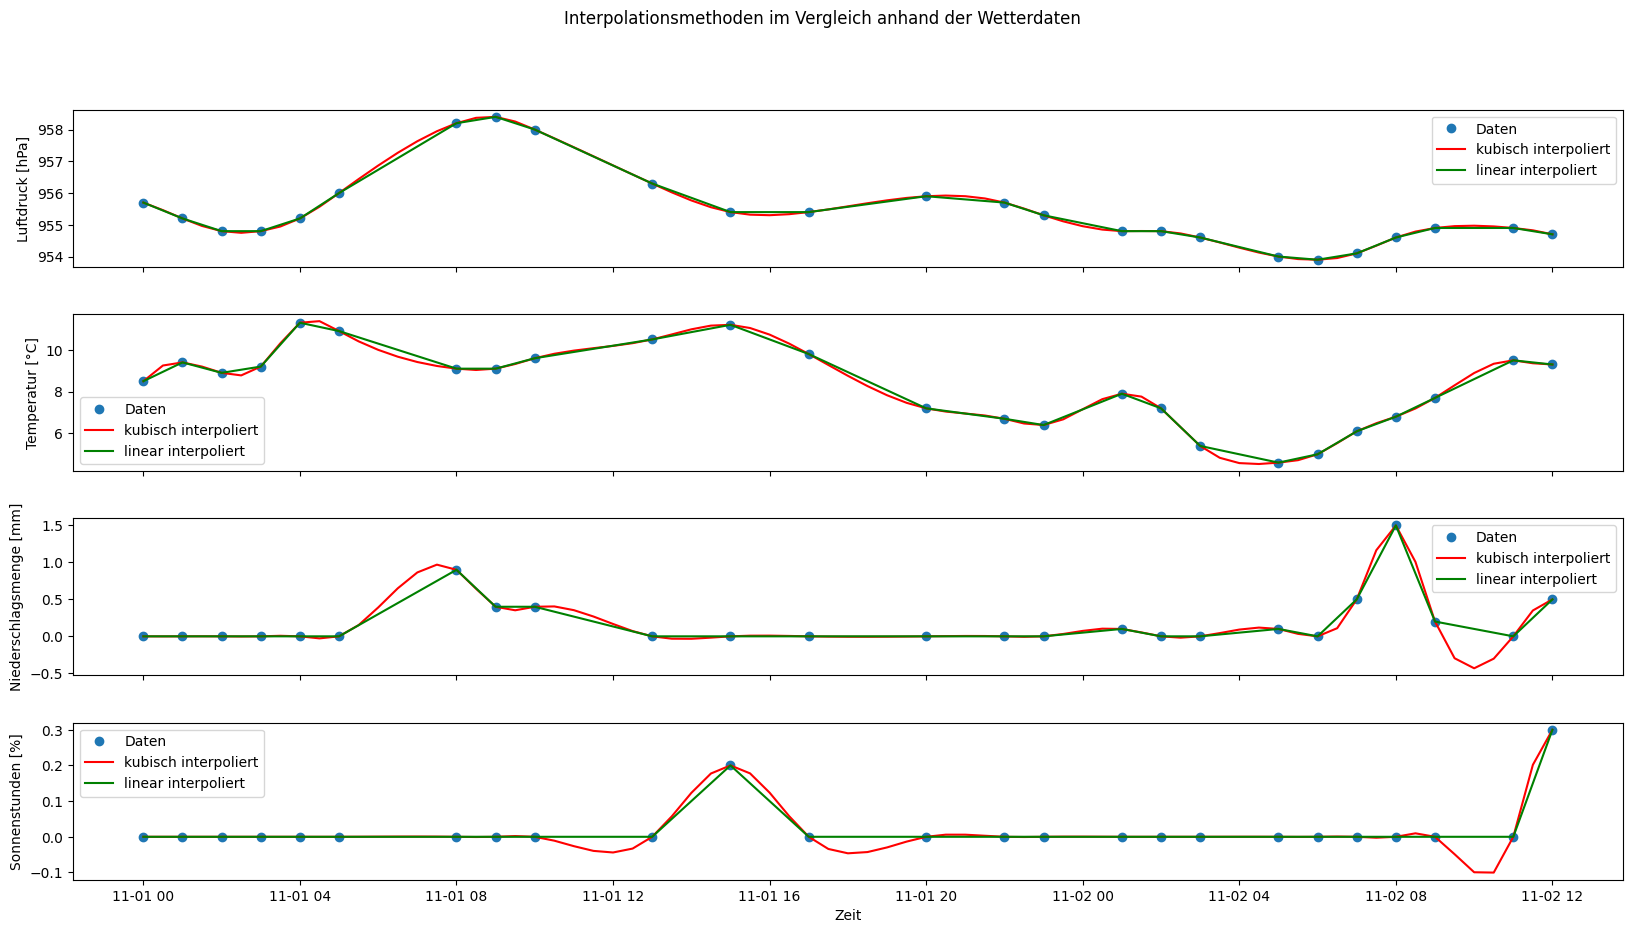

In [7]:
#Plot über einen bestimmten Zeitraum um die Interpolationsmethoden zu vergleichen
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, sharex=True, figsize=(20,10))
fig.subplots_adjust(wspace=0.5, hspace=0.3)

ax1.plot(datetime_demo, pressure[:25], 'o', label='Daten')
ax1.plot(time_datetime_inter[0:max_demo], pressure_inter_cubic[0:max_demo], 'r-', label='kubisch interpoliert')
ax1.plot(time_datetime_inter[0:max_demo], pressure_inter_linear[0:max_demo], 'g-', label='linear interpoliert')
ax1.set_ylabel('Luftdruck [hPa]')
ax1.legend()

ax2.plot(datetime_demo, temp[:25], 'o', label='Daten')
ax2.plot(time_datetime_inter[0:max_demo], temp_inter_cubic[0:max_demo], 'r-', label='kubisch interpoliert')
ax2.plot(time_datetime_inter[0:max_demo], temp_inter_linear[0:max_demo], 'g-', label='linear interpoliert')
ax2.set_ylabel('Temperatur [°C]')
ax2.legend()

ax3.plot(datetime_demo, rain[:25], 'o', label='Daten')
ax3.plot(time_datetime_inter[0:max_demo], rain_inter_cubic[0:max_demo], 'r-', label='kubisch interpoliert')
ax3.plot(time_datetime_inter[0:max_demo], rain_inter_linear[0:max_demo], 'g-', label='linear interpoliert')
ax3.set_ylabel('Niederschlagsmenge [mm]')
ax3.legend()

ax4.plot(datetime_demo, sunshine[:25], 'o', label='Daten')
ax4.plot(time_datetime_inter[0:max_demo], sunshine_inter_cubic[0:max_demo], 'r-', label='kubisch interpoliert')
ax4.plot(time_datetime_inter[0:max_demo], sunshine_inter_linear[0:max_demo], 'g-', label='linear interpoliert')
ax4.set_ylabel('Sonnenstunden [%]')
ax4.legend()

plt.xlabel('Zeit')
plt.suptitle('Interpolationsmethoden im Vergleich anhand der Wetterdaten')
plt.show()

### Auswahl der Interpolationsmethoden

Entscheidung: 
- Temperatur und Luftdruck: kubische Interpolation 
- Sonnenstunden und Niederschlagsmenge: lineare Interpolation 

Für die zeitliche Interpolation der Parameter *Temperatur* und *Luftdruck* haben wir die kubische Funktion gewählt. Dies ermöglicht eine präzisere Ermittlung der stündlichen Werte zwischen den Messzeitpunkten im Vergleich zur linearen Funktion. Normalerweise weisen Temperatur- und Luftdruckkurven einen glatten Verlauf auf, ohne scharfe Ecken oder Diskontinuitäten. Die lineare Interpolation konnte die vielen Schwankungen in den Daten nicht genau darstellen.

Die *Sonnenstunden* und *Niederschlagsmengen* wurden hingegen linear interpoliert, da diese Werte nicht unter Null fallen können, was bei der Verwendung der kubischen Funktion passiert ist. In unserem Demo-Plot "`Interpolationsmethoden im Vergleich anhand der Wetterdaten`" ist zu sehen, dass die Daten für Sonnenstunden und Niederschlagsmenge unteranderem auch linear verlaufen können und viel weniger Schwankungen als bei den Temperatur- und den Luftruckdaten aufweisen.

## 3. Ihr sollt alle Variablen (Luftdruck, Temperatur, Regenmenge und Sonnenstunden) über einen selbstgewählten Zeitraum darstellen. 
   - Basisvariante: Wähle einen interessanten Zeitraum von 1-2 Wochen.
   - Schwierigere Variante (mehr Punkte): Errechne tageweise Durchschnitte, um die Variablen in einem grösseren Zeitraum (mehrere Monate/Quartal) darzustellen.

### Tagesdurschnitt berechnen

1. Es wurden leere *Arrays* erstellt:
    - für die Datumsinformationen
    - um die Durchscnittswerte der Wettterparameter darin zu speichernn

2. Die Anzahl der unvollständigen Stunden `incomplete_hours` wird berechnet, indem die Anzahl der Werte im Zeitvektor `time_new` *modulo (%)* $48$ genommen wird. Dies liegt daran, dass pro Tag $48$ Messwerte vorliegen.

3. Berechnung des Tagesdurchschnitts:
    - In einer Schleife wird der Tagesdurchschnitt für jeden Tag berechnet. Die entsprechenden Werte für Luftdruck, Temperatur, Niederschlag und Sonnenschein werden summiert, und nach jeweils $48$ Messwerten wird der Durchschnitt gebildet und den entsprechenden *Arrays* hinzugefügt. Die Variablen für den Durchschnitt werden danach zurückgesetzt.

In [8]:
#Initalisieren der Variablen, um den Tagesdurschnitt zu berechnen
daily_pressure = np.array([]).astype(float)
daily_average_pressure = 0

daily_temp = np.array([]).astype(float)
daily_average_temp = 0

daily_rain = np.array([]).astype(float)
daily_average_rain = 0

daily_sunshine = np.array([]).astype(float)
daily_average_sun = 0

date = np.array([]).astype(datetime.date)

#für den letzten Tag wird der Durchschnitt nicht gerechnet, da die letzte stunde fehlt und somit wir die Daten für genau ein Jahr haben.
incomplete_hours = len(time_new) % 48

#Tagesdurschnitt berechnen (pro Tag 48 Messwerte)
for i in range(len(time_new) - incomplete_hours):
    daily_average_pressure += pressure_inter_cubic[i]
    daily_average_temp += temp_inter_cubic[i]
    daily_average_rain += rain_inter_linear[i]
    daily_average_sun += sunshine_inter_linear[i]
    if (i+1) % 48 == 0:
        daily_pressure = np.append(daily_pressure, daily_average_pressure/48)
        daily_average_pressure = 0
        daily_temp = np.append(daily_temp, daily_average_temp/48)
        daily_average_temp = 0
        daily_rain = np.append(daily_rain, daily_average_rain/48)
        daily_average_rain = 0
        daily_sunshine = np.append(daily_sunshine, daily_average_sun/48)
        daily_average_sun = 0
        date = np.append(date, time_datetime_inter[i].astype(datetime.datetime).date())



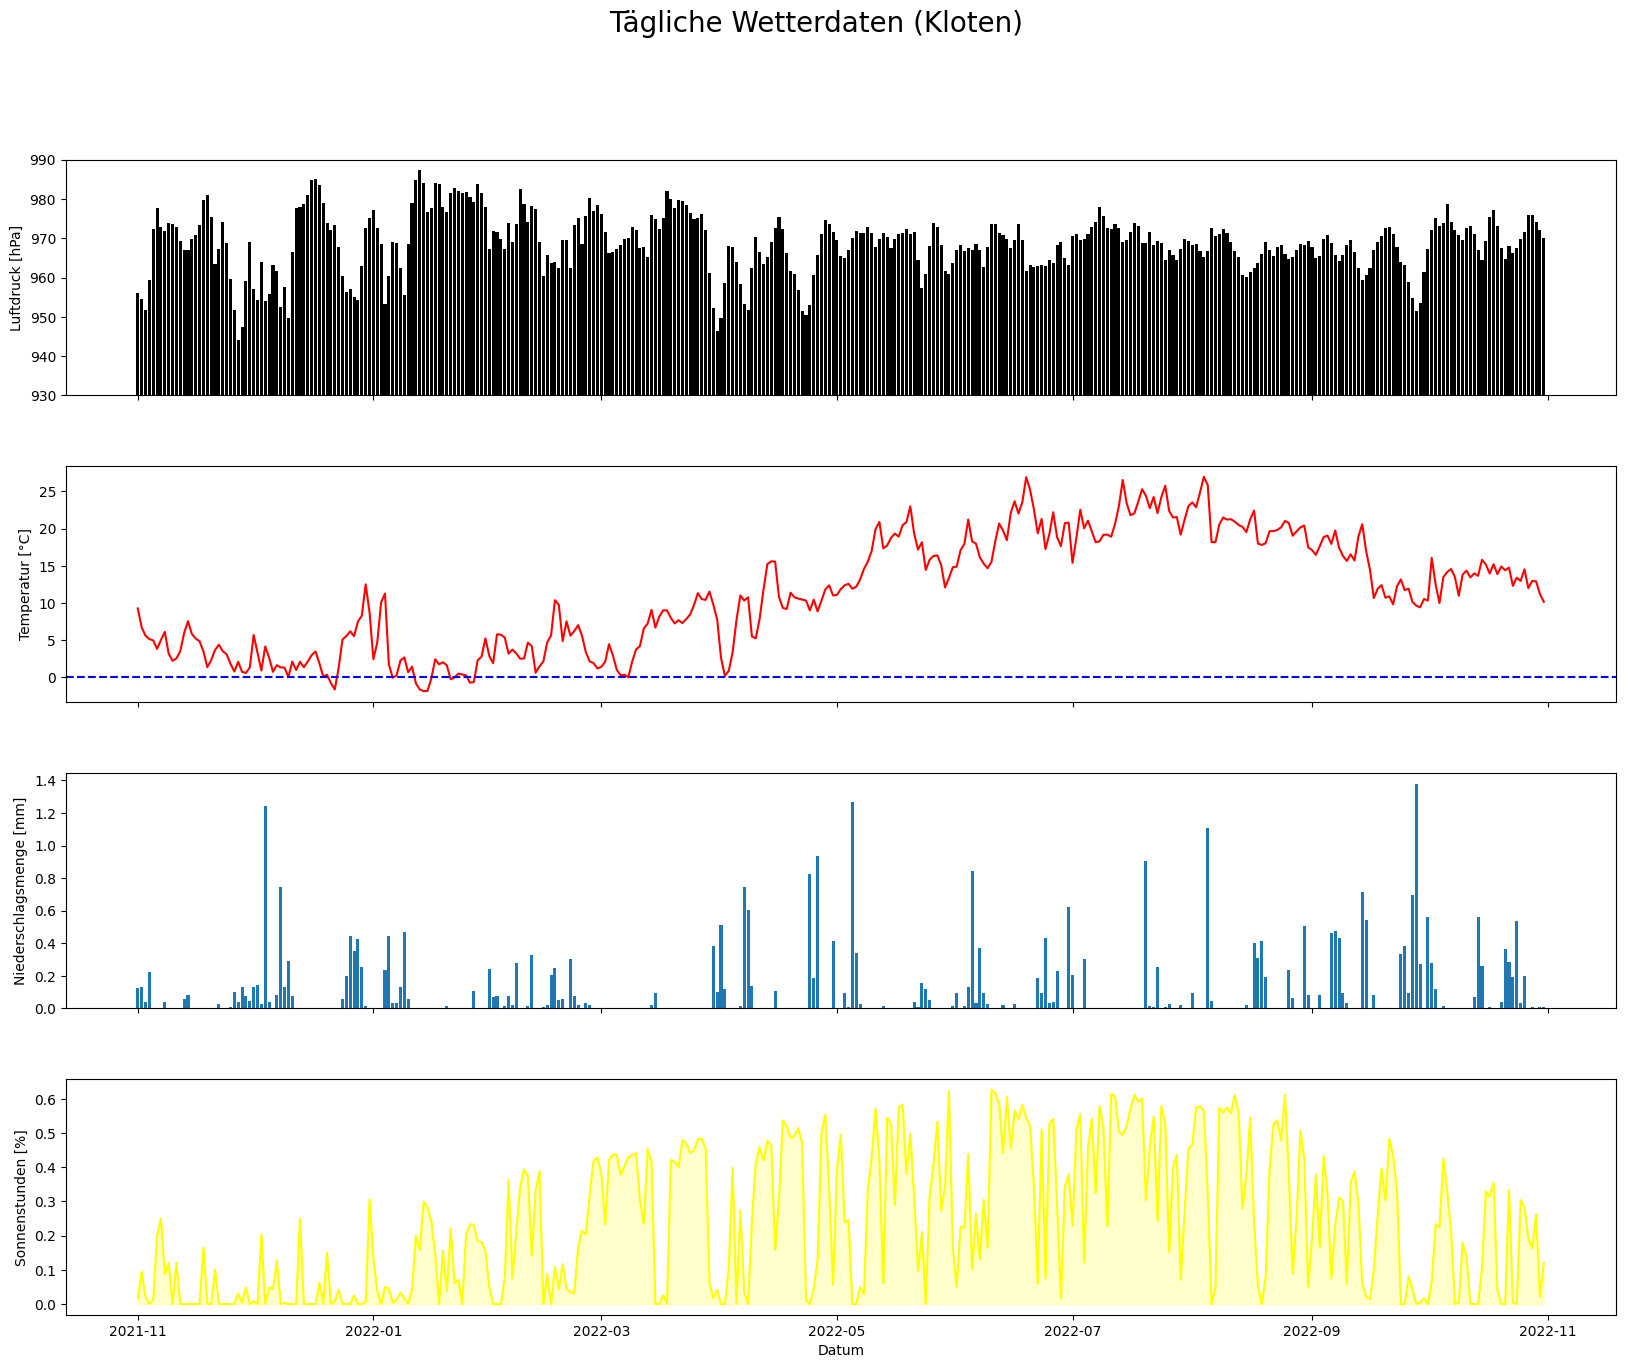

In [9]:
#Plot erstellen für die Tagesdurschnittsdaten
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, sharex=True, figsize=(20,15))
fig.subplots_adjust(wspace=0.5, hspace=0.3)

ax1.bar(date, daily_pressure, color='black')
ax1.set_ylim(930,990)
ax1.set_ylabel('Luftdruck [hPa]')


ax2.plot(date, daily_temp, color='red')
ax2.set_ylabel('Temperatur [°C]')
ax2.axhline(0, color='blue', linestyle='--')

ax3.bar(date, daily_rain)
ax3.set_ylabel('Niederschlagsmenge [mm]')

ax4.plot(date, daily_sunshine, color='yellow')
ax4.fill_between(date, daily_sunshine, 0, alpha=0.2, color='yellow')
ax4.set_ylabel('Sonnenstunden [%]')

plt.xlabel('Datum')
plt.suptitle('Tägliche Wetterdaten (Kloten)', fontsize=20)
plt.show()

**Bemerkungen:**
- Zeitraum: 
Der ausgewählte Zeitraum erstreckt sich genau über ein Jahr. Dieser wurde gewählt, um eine ausreichende Datenmenge zu haben und ein jahreszeitliches Muster der Wetterdaten zu erfassen.
- Linien und Histogramme: 
    - Linien-Diagramme wurden verwendet, um den Verlauf von Temperatur und Sonnenstunden über die Zeit darzustellen. Der Vorteil von Linien liegt darin, dass kontinuierliche Daten gut visualisierbar sind. Zudem wurden die Sonnenstunden mit einer Flächenfüllung unter der Linie versehen, um den Bereich der sonnigen Stunden zu betonen.
    - Histogramme wurden für die Darstellung von Luftdruck und Niederschlagsmenge verwendet. Der Vorteil von Histogrammen liegt darin, dass diskrete Daten gut abbildbar sind. (Niederschlag z.B., ist keine kontinuierliche Größe, sondern immer mit einem Niederschlagsereignis verbunden. Zudem sind es aggregierten Werte, die den gesamten gefallenen Niederschlag in einem bestimmten Zeitraum wieder geben.)


## 4. Für die folgenden Punkte sollt ihr eine der Variablen auswählen.
   - Entweder Luftdruck, Temperatur, Regenmenge oder Sonnenstunden

#### Temperature it is!

In [10]:
#Nochmals interpolieren, damit wir eine Funktion haben mit nur den Temperatur daten
f_cubic_temp = interp1d(time, temp, kind='cubic')

## 5. Vergleicht die ursprünglichen Daten mit den interpolierten Daten und zeigt eure Erkenntnisse auf. 
   - Hier könnt ihr euch z.B. fragen, wie sich unterschiedliche Interpolationsmethoden verhalten.

Wie wirken sich verschiedene Interpolationsmethoden auf den Wetterparameter Temperatur aus? 

In diesem Vergleich wurden nur die lineare `kind=linear` und kubische `kind=cubic` Interpolation miteinander verglichen, während andere Methoden wie "nearest" und "quadratic" ausgelassen wurden. **warum**

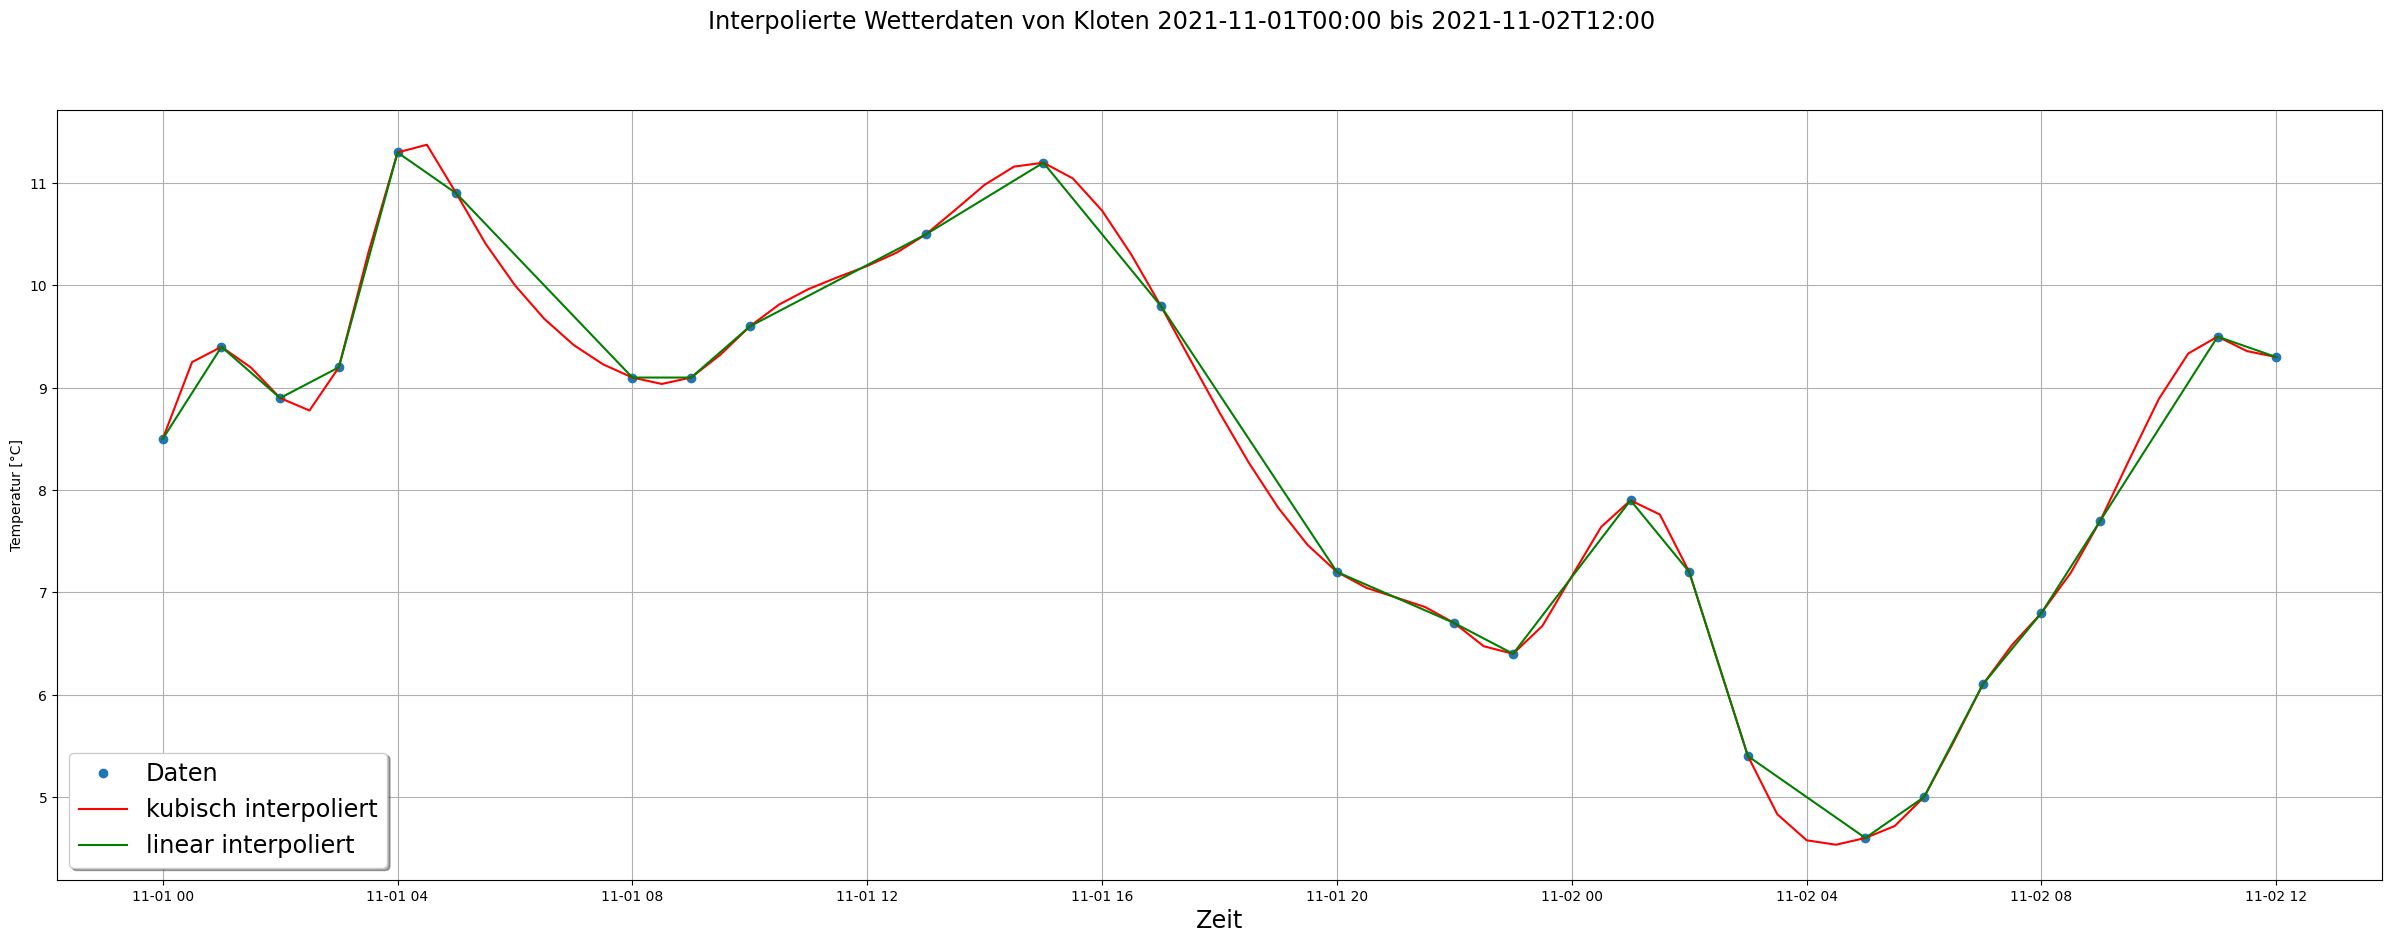

In [11]:
#Plot der unterschiedlich interpolierten Temperaturdaten erstellen
fig, ax = plt.subplots(figsize=(30,10))

ax.plot(datetime_demo, temp[:25], 'o', label='Daten')
ax.plot(time_datetime_inter[0:max_demo], temp_inter_cubic[0:max_demo], 'r-', label='kubisch interpoliert')
ax.plot(time_datetime_inter[0:max_demo], temp_inter_linear[0:max_demo], 'g-', label='linear interpoliert')
ax.set_ylabel('Temperatur [°C]')
ax.legend( loc='lower left', shadow=True, fontsize='xx-large')

plt.grid()
plt.xlabel('Zeit', fontsize='xx-large')

plt.suptitle('Interpolierte Wetterdaten von Kloten {0} bis {1}'.format(time_datetime_inter[0], time_datetime_inter[max_demo-1]), fontsize='xx-large')
plt.show()

Entscheidung, basierend auf den Erkenntnissen aus Aufgabe 2 *Daten Interpolieren*:
 - Da die Temperaturdaten nicht-linear verlaufen, sondern viele Schwankungen (Höhen und Tiefen) aufweisen, ermöglicht die kubische Interpolation eine genauere Darstellung der Temperaturkurve. Im Gegensatz dazu liefert die lineare Interpolation eine geradlinige Verbindung zwischen den Datenpunkten und ist daher unpassend (ungenauer) um die Temperaturdaten zu interplieren.

Bemerkungen: 
 - Bei der Visualisierung der interpolierten Temperaturdaten über einen Zeitraum von 1.5 Tagen, ist uns aufgefallen, dass an gewissen Temperaturtief- und Hochpunkten aussergewöhlichen Aussschläge, erkennbar sind. Am 1.11.2021, nach 04:00 Uhr ist dies z.B. gut ersichtlich. Wir gehen davon aus, dass diese insensitivität gegenüber den Temperaturschwankungen mit der Anzahl der Messungen nach der Interpolation zusammenhänt. Für eine präzisere Abbildung der Temperaturkurve durch die Interpolation zu erreichen, hätten wir die Messungen in noch kürzeren Zeitintervallen durchführen müssen.

## 6. Berechnet Nullstellen bzw. Schnittpunkte mit einem Schwellenwert und überlegt euch, welche Aussagen ihr daraus ableiten könnt.
Wir ermitteln zuerst an wie vielen Tagen die Temperatur in Kloten unter Null Grad fällt und danach versuchen wir mit numerischen Mitteln Zeitpunkte im Januar zu bestimmen in welchen genau Null Grad ist.

### Minustemperaturen auslesen & ausgeben

In [12]:
#hier kommt ein kommentar
nullstellen = np.where(temp_inter_linear < 0)

In [13]:
zer0temp_days = time_datetime_inter[nullstellen]

# Eindeutige Tage extrahieren
unique_days = np.unique(np.datetime_as_string(zer0temp_days, unit='D'))

In [14]:
print('Anzahltage mit Minustemperaturen:', len(unique_days))
print('Letzter Tag im Winter/Frühling 21/22 in dem die Temperatur nochmals unter Null fiel:' , unique_days[-1])

Anzahltage mit Minustemperaturen: 86
Letzter Tag im Winter/Frühling 21/22 in dem die Temperatur nochmals unter Null fiel: 2022-04-11


### Temperatur nahe 0 °C finden mit numerischen Mittel

1. Im ersten Teil des Codes werden die Start- und Endzeitpunkte für den betrachteten Zeitraum festgelegt. In diesem Fall wird der Zeitraum vom 1. Januar 2022 bis zum 14. Januar 2022 gewählt, da viele Nullstellen erwartet werden.
2. Um mögliche Nullstellen mit dem Auge zu erkennen wird anschließend wird ein Plot erstellt, der die Temperaturwerte im definierten Zeitraum zeigt.
3. Nachdem der Plot erstellt wurde, sollen die Nullstellen der Funktion f_cubic_temp im betrachteten Zeitraum ermittelt werden. Hierzu werden das Newtonverfahren und das Bisektionsverfahren verwendet. Das Newtonverfahren wird durch die Funktion optimize.newton aufgerufen und erhält als Startwert den Zeitpunkt des 1. Januar 2022. Das Bisektionsverfahren wird durch die Funktion optimize.bisect zweimal aufgerufen und erhält als Intervallgrenzen verschiedene Zeitpunkte im Januar 2022.
4. Die gefundenen Nullstellen werden in den Datentyp datetime64[m] konvertiert, um sie in dem Plot verwenden zu können. Dies erfolgt für alle drei Nullstellen zero1_datetime, zero4_datetime und zero5_datetime.
5. Im letzten Teil des Codes wird ein neuer Plot erstellt, der die Temperaturwerte im betrachteten Zeitraum sowie die gefundenen Nullstellen zeigt.

In [15]:
#Zeitraum mit vielen Nullstellen
january_start = np.datetime64('2022-01-01T00:00').astype(float)
january_start_index = int(np.where(time_new == january_start)[0])

january_end = np.datetime64('2022-01-14T23:30').astype(float)
january_end_index = int(np.where(time_new == january_end)[0])

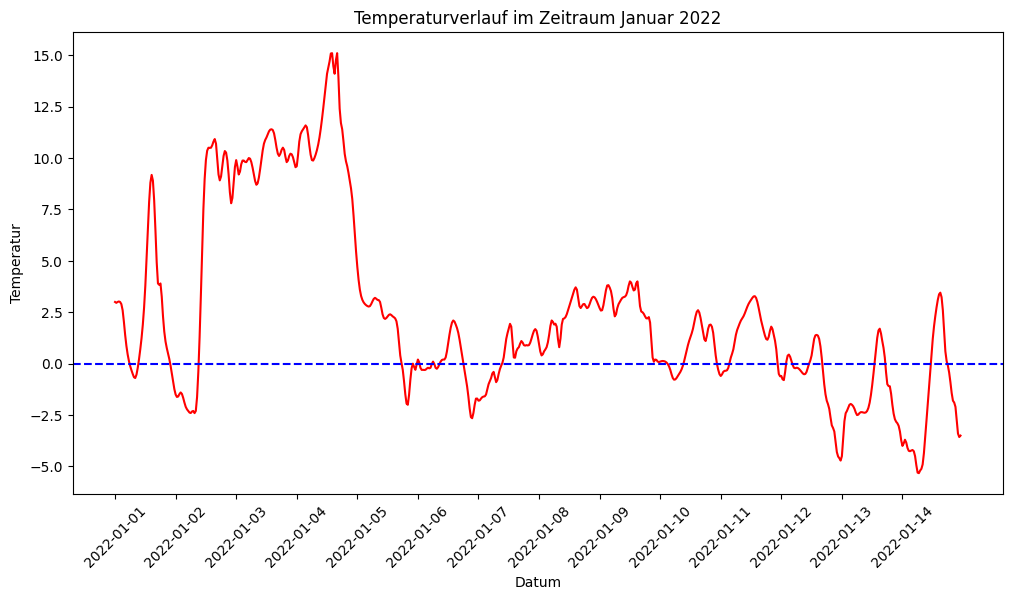

In [16]:
# Plot der Funktion
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(time_datetime_inter[january_start_index:january_end_index], temp_inter_cubic[january_start_index:january_end_index], color='red')
ax.axhline(0, color='blue', linestyle='--')

ax.set_xlabel('Datum')
x_ticks = np.arange(time_datetime_inter[january_start_index], time_datetime_inter[january_end_index], np.timedelta64(24, 'h'))
ax.set_xticks(x_ticks)

plt.xticks(rotation = 45)
plt.ylabel('Temperatur')
plt.title('Temperaturverlauf im Zeitraum Januar 2022')

plt.show()

In [17]:
#Nullstellen ermitteln mit dem Newtonverfahren
zero1 = optimize.newton(f_cubic_temp, np.datetime64('2022-01-01T00:00').astype(float)) 

#Nullstellen ermitteln mit dem Bisektionsverfahren
zero2 = optimize.bisect(f_cubic_temp, np.datetime64('2022-01-02T00:00').astype(float), np.datetime64('2022-01-03T00:00').astype(float))
zero3 = optimize.bisect(f_cubic_temp, np.datetime64('2022-01-01T12:00').astype(float), np.datetime64('2022-01-02T00:00').astype(float))

In [18]:
#Nullstellen wieder der x-Achse für den plot anpassen
zero1_datetime = zero1.astype("datetime64[m]")
zero4_datetime = np.float64(zero2).astype("datetime64[m]") #bisektion verfahren gibt den typ float zurück (und nicht typ np.float64) und dieser lässt sich nicht direkt in dateteim64 umwandeln
zero5_datetime = np.float64(zero3).astype("datetime64[m]")

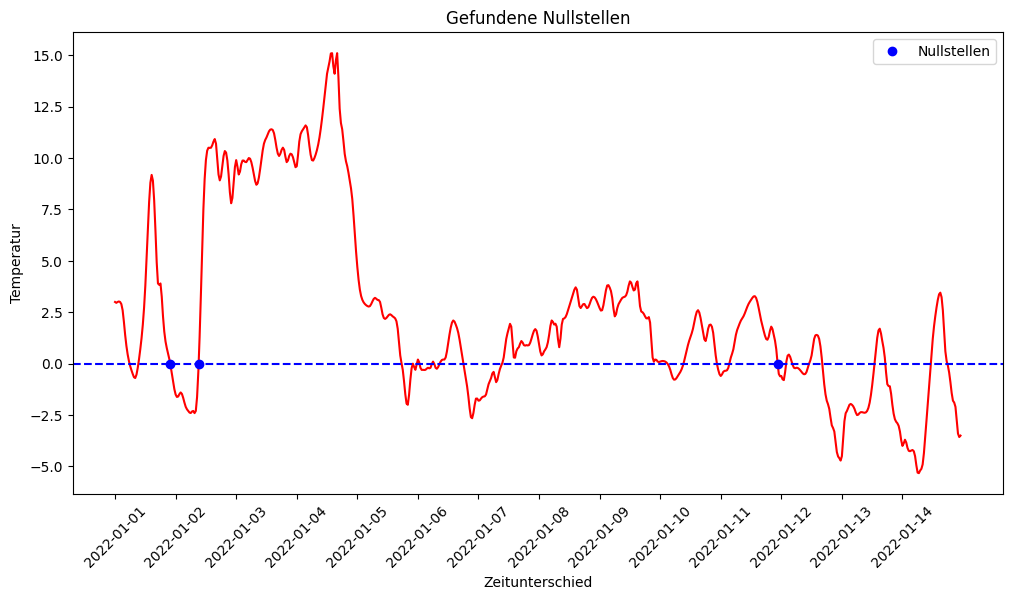

In [19]:
#Gefundene Nullstellen ploten
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(time_datetime_inter[january_start_index:january_end_index], temp_inter_cubic[january_start_index:january_end_index], color='red')

ax.plot([zero1_datetime, zero4_datetime, zero5_datetime], [f_cubic_temp(zero1),f_cubic_temp(zero2),f_cubic_temp(zero3)], "ob", label="Nullstellen")
ax.axhline(0, color='blue', linestyle='--')

ax.set_xlabel('Zeitunterschied')
ax.set_ylabel('Temperatur')
ax.set_title('Gefundene Nullstellen')

# Einen Tick pro Tag anzeigen
x_ticks = np.arange(time_datetime_inter[january_start_index], time_datetime_inter[january_end_index], np.timedelta64(24, 'h'))
ax.set_xticks(x_ticks)

plt.xticks(rotation=45)

ax.legend()
plt.show()

- Die Methoden sind recht genau sehr genau....
    - In der Newton-Methode hätte man noch einen toleranz Wert und Maximale wiederholeung angeben können um auf ein noch genaueres Ergebnis zu kommen. Das Ergebnis ist aber auch so genau genug für unsere Zwecke.
- Interpolation mit time hat das ganze Komplizierter gemacht mit hin und her formatieren des Zeitpunktes, ist aber für die Darstellung schöner.

erkentnisse probleme... -> f_cubic_temp bzw. interpolationsmethode den richtigen x-Wert benutzen 

Und wieso hat er bei Interpolation mit time_diff für temperatur nicht den gleichen wert zum beispiel für time_diff=1464.0 temp wäre = 3.0 bei der Interpolationsmethode 2.99999999

## 7. Mithilfe der Ableitung soll nach grossen Änderungen in den Daten gesucht werden. 
Hier wird der Tag mit der kleinsten und grösstenSteigung der Temperaturen ermittelt mit der np.gradient-Funktion.

1. Berechnung dier Steigung (bzw. den Gradienten) der Temperaturwerte in dem Array temp_inter_cubic.
2. Kleinster und grösster Wert auslesen uns ausgeben

In [20]:
#Steigung der Temperaturen berechnen
df = np.gradient(temp_inter_cubic)

#Index der kleinste steigung bzw. grösste Abnahme auslesen
i_min = np.argmin(df)
#Index der grössten steigung auslesen
i_max = np.argmax(df) 

print("maximale Abnahme:",(df[i_min]), "am", (time_datetime_inter[i_min])) 
print("maximale Zunahme:",(df[i_max]), "am", (time_datetime_inter[i_max]))

maximale Abnahme: -3.8999999999999986 am 2022-08-05T17:30
maximale Zunahme: 2.3 am 2022-02-24T09:30


Erkenntnis: np.gradient rechnet auch für den ersten und letzten wert eine Steigung -> für uns irrelevant?

Die Funktion np.gradient aus dem NumPy-Paket wird verwendet, um die numerische Ableitung der Temperaturwerte zu berechnen. Sie berechnet die Änderungsrate (Steigung) zwischen aufeinanderfolgenden Werten im Array und gibt ein neues Array zurück, das die berechneten Steigungswerte enthält.

Standardmäßig verwendet np.gradient eine Methode der zentralen Differenzen, bei der die Steigung am ersten Punkt und am letzten Punkt auf Basis der umliegenden Werte berechnet wird. Es wird eine symmetrische Differenz verwendet, die sowohl Werte vor dem betrachteten Punkt als auch Werte nach dem betrachteten Punkt einbezieht.

## 8. Benutze die Integration, um gewisse Durchschnittswerte über einen definierten Zeitraum zu berechnen.
In diesem Abschnitt werden die durchschnitts Temperatur über den Sommer aufzeigt mit hilfe der integrate.quad-Funktion aus dem scipy-Paket.

1. Zunächst werden die Start- und Enddaten des astronomischen Sommers auf der Nordhalbkugel definiert.

2. Die Funktion mean_func_extended wird definiert, um den Durchschnitt einer gegebenen Funktion über einen bestimmten Bereich zu berechnen. Die Funktion verwendet die integrate.quad-Funktion aus dem scipy-Paket, um das Integral der Funktion über mehrere Untereintervalle zu berechnen. Die Anzahl der Untereintervalle wird durch den Parameter num_subintervals festgelegt.

3. Die Funktion mean_func_extended wird verwendet, um den Durchschnitt der Temperatur über den Sommer zu berechnen. Der Funktionsname f_cubic_temp wird als Argument übergeben, zusammen mit den Start- und Enddaten des Sommers und der Anzahl der Untereintervalle (in diesem Fall 80).

4. Ein Diagramm wird erstellt, das die Temperatur während des Sommers darstellt. Die Funktion ax.plot wird verwendet, um die Temperaturdaten zwischen den Start- und Endindizes zu plotten. Eine horizontale Linie wird hinzugefügt, die den berechneten Durchschnitt der Temperatur darstellt. Das Diagramm enthält auch Achsentitel und eine Legende.

In [21]:
#Beginn des astronomischen Sommers auf der Nordhalbkugel 

#Beginn des astronomischen Sommers auf der Nordhalbkugel wird als Float-Wert abgespeichert, da unsere X-Achse unser interpolationsfunktion f_cubic_temp auch Zeitwerte als float hat.
summer_start = np.datetime64('2022-06-21T00:00').astype(float)
summer_start_index = int(np.where(time_new == summer_start)[0])

#Ende des astronomischen Sommers auf der Nordhalbkugel
summer_end = np.datetime64('2022-09-22T00:00').astype(float)
summer_end_index = int(np.where(time_new == summer_end)[0])

Funktion um die Funktion der interpolierten Daten zu integrieren. Dazu verwenden wir die scypi.integrate Funktion "quad". Für die Genauigkeit sind Subintervalle nötig, sonst gibt die Funktion "quad" eine Fehlermeldung aus. Nach dem Runden wäre das Ergebnis auch ohne Subintervalle korrekt, jedoch nehmen wir die wenige sekunden in kauf aufgrund ästhetischen Gründen (keine Fehlermeldung im Notebook).

Die Funktion mean_func_extended berechnet den durchschnittlichen Wert einer Funktion func über das Intervall von a bis b durch Aufteilung des Intervalls in num_subintervals Untereinheiten. Sie verwendet die Funktion integrate.quad aus dem Modul scipy.integrate, um das Integral der Funktion über jedes Untereinheit-Intervall zu berechnen.

In [22]:
#Durschnitt berechnen anhand eines Funktionsabschnitts unterteilt in intervalle
def mean_func_extended(func, a, b, num_subintervals):
    interval_width = (b - a) / num_subintervals
    integral_sum = 0.0

    for i in range(num_subintervals):
        subinterval_a = a + i * interval_width
        subinterval_b = subinterval_a + interval_width
        integral, error = integrate.quad(func, subinterval_a, subinterval_b)
        integral_sum += integral

    return integral_sum / (b - a)

In [23]:
#Durschnittstemperatur berechnung in den Sommertagen
mean_temp_extended = mean_func_extended(f_cubic_temp, summer_start, summer_end, 80) #80 Subintervalle, damit keine Fehlermeldung erscheint

#Durschnittstemperatur auf eine Nachkommastelle runden
mean_temp_rounded = round(mean_temp_extended, 1)

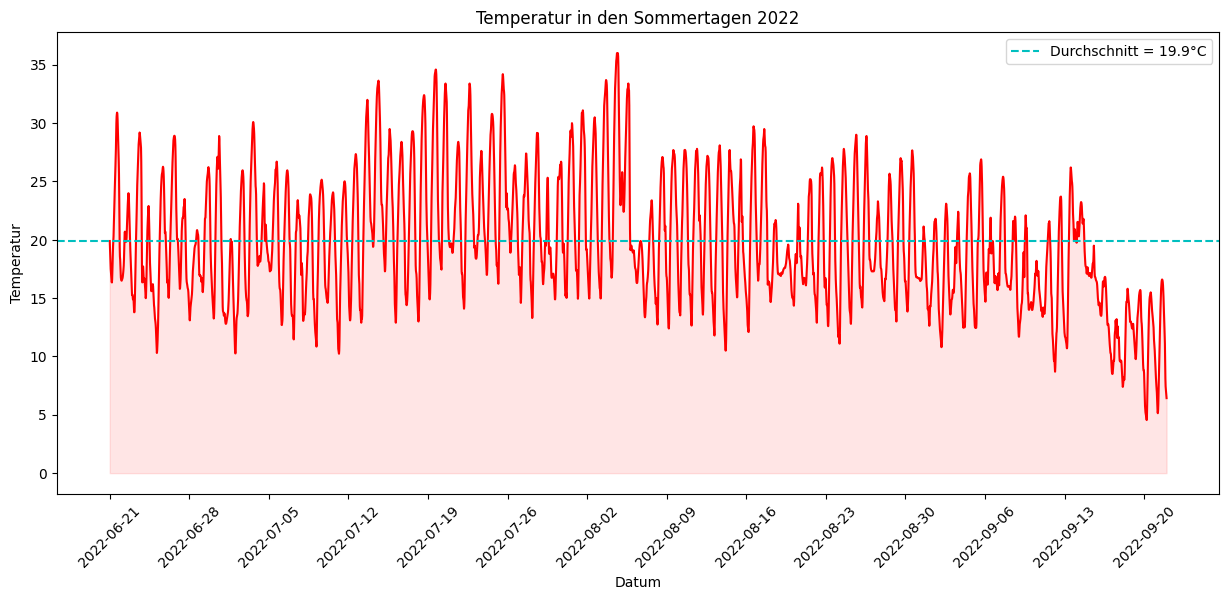

In [24]:
#Plot erstellen der Temperatur in den Sommertagen mit dem Durschnitt
fig, ax = plt.subplots(figsize=(15, 6))
ax.plot(time_datetime_inter[summer_start_index:summer_end_index], temp_inter_cubic[summer_start_index:summer_end_index], color='red')

ax.axhline(y=mean_temp_extended, color='c', linestyle='--', label='Durchschnitt = '+ str(mean_temp_rounded) + '°C')

ax.set_xlabel('Datum')
ax.set_ylabel('Temperatur')
ax.set_title('Temperatur in den Sommertagen 2022')

# Fill-Bereich zwischen den Kurven und der x-Achse
ax.fill_between(time_datetime_inter[summer_start_index:summer_end_index], temp_inter_cubic[summer_start_index:summer_end_index], 0, alpha=0.1, color='red')

# Einen Tick pro Tag anzeigen
x_ticks = np.arange(time_datetime_inter[summer_start_index], time_datetime_inter[summer_end_index], np.timedelta64(168, 'h'))
ax.set_xticks(x_ticks)

plt.xticks(rotation=45)

ax.legend()
plt.show()

In [25]:
print("Die Durschnittstemperatur durch den Sommer betrug", mean_temp_rounded, "°C")

Die Durschnittstemperatur durch den Sommer betrug 19.9 °C


#### Interpretation der Ergebnisse: 
Der Code berechnet den Durchschnitt der Temperatur während des Sommers auf der Nordhalbkugel. Die berechnete Durchschnittstemperatur wird auf eine Nachkommastelle gerundet und im Diagramm dargestellt. Der Plot zeigt die Temperatur während des Sommers und markiert den berechneten Durchschnitt als gestrichelte Linie. Durch das Füllen des Bereichs zwischen den Kurven und der x-Achse wird der Temperaturbereich visuell hervorgehoben. Das Diagramm liefert einen visuellen Überblick über die Temperaturänderungen während des Sommers.



## Zusammenfassung eurer wichtigsten Ergebnisse und Erkenntnisse
- Fügt am Ende des Notebooks eine Zusammenfassung eurer wichtigsten Ergebnisse und Erkenntnisse ein.
- Die Gruppenarbeit soll abschliessend hinsichtlich Zusammenarbeit, Rollenverteilung und Einschätzung der individuellen Beiträge reflektiert werden (am Ende des Jupyter Notebooks).

- schwierigkeiten mit Zeit und Datum
- gibt immer viele verschiedene Lösung, herausfinden welche passt am besten ist nicht einfach

In diesem Dokument wurde eine Analyse der Wetterdaten für Kloten durchgeführt. Die Daten wurden importiert und vorbereitet, indem sie transponiert und in geeignete Datentypen umgewandelt wurden. Da einige Datenpunkte fehlten, wurden verschiedene Interpolationsmethoden angewendet, um diese Lücken zu füllen. 

Die Entscheidung fiel auf die kubische Interpolation für die Parameter Temperatur und Luftdruck, da diese eine genauere Darstellung der Kurven ermöglichten. Für Sonnenstunden und Niederschlagsmenge wurde die lineare Interpolation verwendet. Die Visualisierung der interpolierten Daten über einen ausgewählten Zeitraum ermöglichte einen Vergleich mit den ursprünglichen Daten. 

Es wurde festgestellt, dass die kubische Interpolation genaue Ergebnisse für die Temperatur lieferte, während die lineare Interpolation für Sonnenstunden und Niederschlagsmenge ausreichend war. Es wurden jedoch Probleme bei der Genauigkeit der Temperaturinterpolation festgestellt, insbesondere bei extremen Temperaturschwankungen. 

Die Nullstellen der Temperatur wurden numerisch berechnet, um Tage mit Temperaturen unter null Grad zu identifizieren. Dabei wurden sowohl das Newton-Verfahren als auch das Bisektionsverfahren verwendet. Es wurden auch große Änderungen in den Temperaturdaten mithilfe der Ableitung ermittelt. 

Die Integration wurde genutzt, um Durchschnittswerte für bestimmte Zeiträume zu berechnen. Insbesondere wurde der Durchschnitt der Temperatur über den Sommer ermittelt. 

Insgesamt ergaben sich wichtige Erkenntnisse über die Daten und deren Interpretation. Es wurden jedoch auch einige Probleme festgestellt, insbesondere in Bezug auf die Genauigkeit der Interpolation bei extremen Temperaturschwankungen. Diese Ergebnisse liefern eine solide Grundlage für weitere Untersuchungen und Analysen der Wetterdaten von Kloten. 